# Phase 1: Analyze Target Fragment Distribution

This notebook analyzes the distribution of real SwissProt fragments to establish target statistics for synthetic fragment generation.

**Goal**: Generate 200,000 sequences total:
- 100,000 non-fragmented (complete) sequences
- 100,000 synthetic fragments matching the distribution from clean_data.csv

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## 1. Load and Inspect Data

In [16]:
# Load the clean fragment data
df = pd.read_csv('clean_data.csv')
print(f"Total fragments: {len(df):,}")
df.head(10)

Total fragments: 9,280


,identifier,sequence,n_X,fragment_type
0,A0A068B6Q6,PDGRNAAAKAFDLITPTVRKGCCSNPACILNNPNQCG,0,terminal_N
1,A0A0D4WTV1,EGAEQDGSERTDGGRPIWNIAHMVNNKQAIDKYLDKGANSVESDVS...,0,terminal_N
2,A2QC57,MAGPAPSGRTPSHAQSSLPSLPAHLQSDTHLTAHLASRFHVGLPTA...,0,terminal_C
3,A2TK72,KREAEANRTPEQQIYDPYKYVETVFVVDKAMVTKYNGDLDKIKTRM...,0,terminal_both
4,A5YVK8,AVIPLKNQGKCGSCWAFSTVTTVESINQIRTGNLISLSEQQLVDCS...,0,terminal_both
5,A6XH06,MPLNSLHNLERKPSKAWSTSCTAPAARLQASFSLQQEEPRQIRRSG...,0,terminal_N
6,B1P1F5,KASVLITLAVLGVMFVWTSAAELEERGSDQRDSPALIKSMAKVFQS...,0,terminal_N
7,B3A0N3,DLWQWGQMILKETGKLPFSYYTAYGCYCGWGGRGGKPKADTDRCCF...,0,terminal_C
8,B3EWP6,HLLQFGDLINKIARRNGILYYSFYGCYCGLGGRGRPQDATDRCCFV...,0,terminal_C
9,B5AR80,MNVFFMFSLLFLAALGSCADDGNPLEECFRETDYEEFLEIAKNGLS...,0,terminal_C


In [17]:
# Add sequence length column
df['length'] = df['sequence'].str.len()
df.head()

,identifier,sequence,n_X,fragment_type,length
0,A0A068B6Q6,PDGRNAAAKAFDLITPTVRKGCCSNPACILNNPNQCG,0,terminal_N,37
1,A0A0D4WTV1,EGAEQDGSERTDGGRPIWNIAHMVNNKQAIDKYLDKGANSVESDVS...,0,terminal_N,289
2,A2QC57,MAGPAPSGRTPSHAQSSLPSLPAHLQSDTHLTAHLASRFHVGLPTA...,0,terminal_C,1614
3,A2TK72,KREAEANRTPEQQIYDPYKYVETVFVVDKAMVTKYNGDLDKIKTRM...,0,terminal_both,233
4,A5YVK8,AVIPLKNQGKCGSCWAFSTVTTVESINQIRTGNLISLSEQQLVDCS...,0,terminal_both,184


## 2. Fragment Type Distribution

In [18]:
# Count and percentage for each fragment type
fragment_type_counts = df['fragment_type'].value_counts()
fragment_type_pct = df['fragment_type'].value_counts(normalize=True) * 100

print("Fragment Type Distribution:")
print("="*50)
distribution_df = pd.DataFrame({
    'Count': fragment_type_counts,
    'Percentage': fragment_type_pct.round(2)
})
print(distribution_df)
print(f"\nTotal: {fragment_type_counts.sum():,}")

Fragment Type Distribution:
                      Count  Percentage
fragment_type                          
terminal_C             2700       29.09
terminal_N             2675       28.83
terminal_both          2327       25.08
mixed                  1462       15.75
internal_gap            115        1.24
terminal_unannotated      1        0.01

Total: 9,280


In [19]:
# Save target distribution for later use
target_distribution = fragment_type_pct.to_dict()
print("\nTarget distribution (for 100,000 synthetic fragments):")
print("="*50)
for ftype, pct in target_distribution.items():
    target_count = int(100000 * pct / 100)
    print(f"{ftype:20s}: {pct:6.2f}% → ~{target_count:,} fragments")


Target distribution (for 100,000 synthetic fragments):
terminal_C          :  29.09% → ~29,094 fragments
terminal_N          :  28.83% → ~28,825 fragments
terminal_both       :  25.08% → ~25,075 fragments
mixed               :  15.75% → ~15,754 fragments
internal_gap        :   1.24% → ~1,239 fragments
terminal_unannotated:   0.01% → ~10 fragments


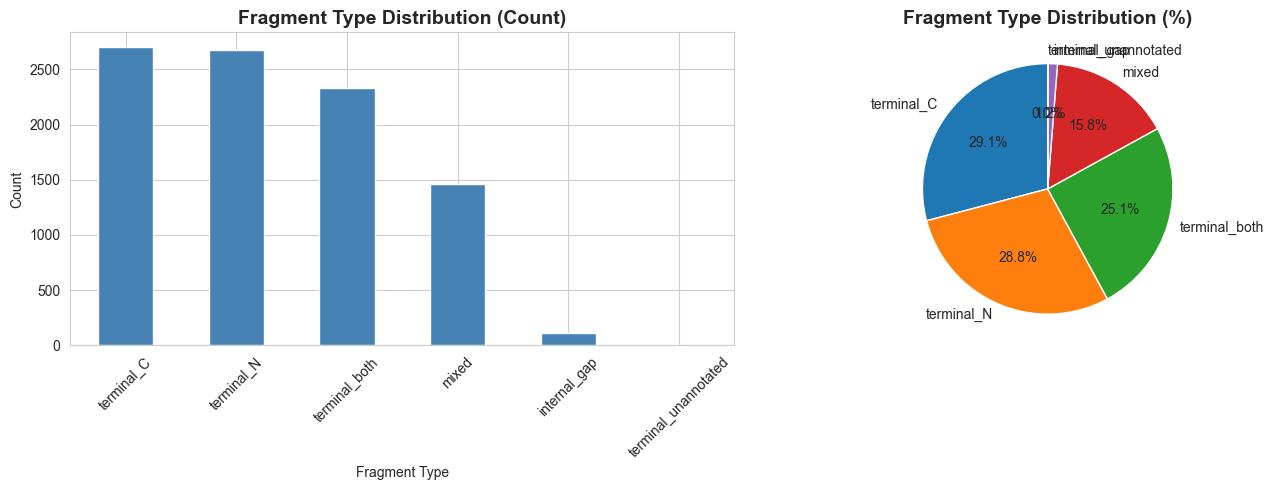

In [20]:
# Visualize fragment type distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Bar plot
fragment_type_counts.plot(kind='bar', ax=ax1, color='steelblue')
ax1.set_title('Fragment Type Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Fragment Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Pie chart
ax2.pie(fragment_type_pct, labels=fragment_type_pct.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Fragment Type Distribution (%)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.savefig('fragment_type_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

## 3. Length Distribution Analysis

In [21]:
# Overall length statistics
print("Overall Length Statistics:")
print("="*50)
print(df['length'].describe())
print(f"\nMedian length: {df['length'].median():.0f}")

Overall Length Statistics:
count    9280.000000
mean      194.273707
std       274.183910
min         4.000000
25%        32.000000
50%       108.000000
75%       273.000000
max      7311.000000
Name: length, dtype: float64

Median length: 108


In [22]:
# Length statistics by fragment type
print("\nLength Statistics by Fragment Type:")
print("="*80)
length_stats_by_type = df.groupby('fragment_type')['length'].describe()
print(length_stats_by_type.round(1))


Length Statistics by Fragment Type:
                       count   mean    std    min    25%    50%    75%     max
fragment_type                                                                 
internal_gap           115.0  329.7  440.2   13.0   87.0  158.0  278.5  2738.0
mixed                 1462.0  153.1  276.2    5.0   23.0   45.5  145.0  3374.0
terminal_C            2700.0  122.7  227.8    4.0   19.0   33.0  142.0  3470.0
terminal_N            2675.0  282.9  287.8    7.0  102.0  226.0  377.0  5120.0
terminal_both         2327.0  194.5  264.6    4.0   54.0  128.0  272.0  7311.0
terminal_unannotated     1.0  695.0    NaN  695.0  695.0  695.0  695.0   695.0


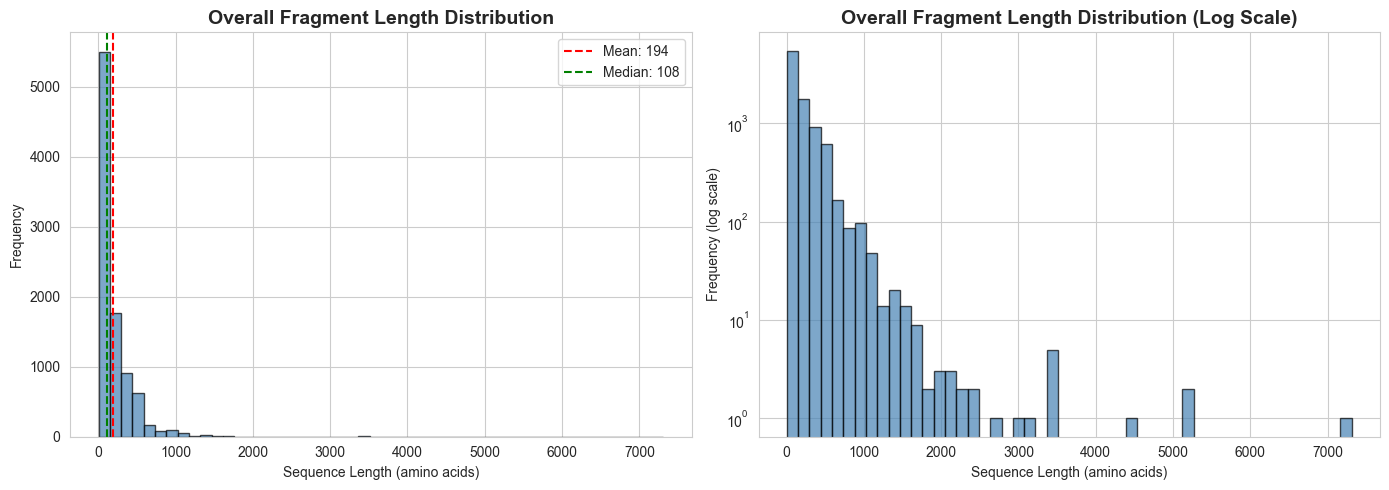

In [23]:
# Plot overall length distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax1.hist(df['length'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax1.axvline(df['length'].mean(), color='red', linestyle='--', label=f'Mean: {df["length"].mean():.0f}')
ax1.axvline(df['length'].median(), color='green', linestyle='--', label=f'Median: {df["length"].median():.0f}')
ax1.set_title('Overall Fragment Length Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Sequence Length (amino acids)')
ax1.set_ylabel('Frequency')
ax1.legend()

# Log scale for better visualization
ax2.hist(df['length'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
ax2.set_yscale('log')
ax2.set_title('Overall Fragment Length Distribution (Log Scale)', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sequence Length (amino acids)')
ax2.set_ylabel('Frequency (log scale)')

plt.tight_layout()
plt.savefig('overall_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

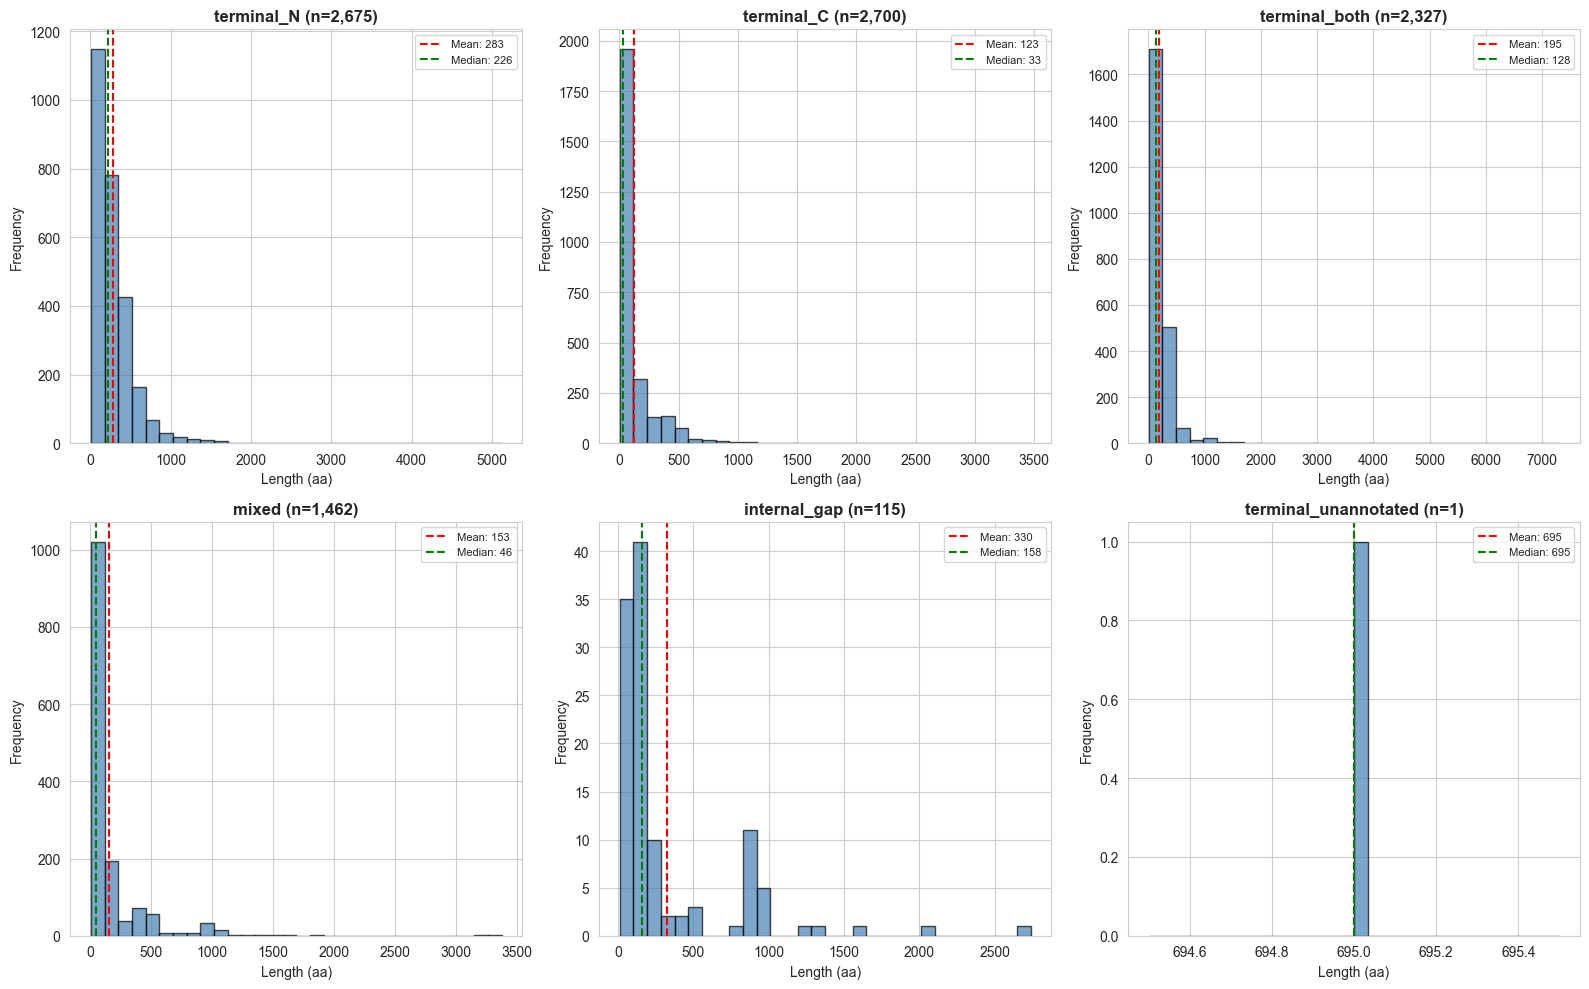

In [24]:
# Plot length distribution by fragment type
fragment_types = df['fragment_type'].unique()
n_types = len(fragment_types)
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.flatten()

for i, ftype in enumerate(fragment_types):
    data = df[df['fragment_type'] == ftype]['length']
    axes[i].hist(data, bins=30, color='steelblue', edgecolor='black', alpha=0.7)
    axes[i].axvline(data.mean(), color='red', linestyle='--', label=f'Mean: {data.mean():.0f}')
    axes[i].axvline(data.median(), color='green', linestyle='--', label=f'Median: {data.median():.0f}')
    axes[i].set_title(f'{ftype} (n={len(data):,})', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Length (aa)')
    axes[i].set_ylabel('Frequency')
    axes[i].legend(fontsize=8)

# Hide unused subplots if any
for j in range(i+1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.savefig('length_distribution_by_type.png', dpi=300, bbox_inches='tight')
plt.show()

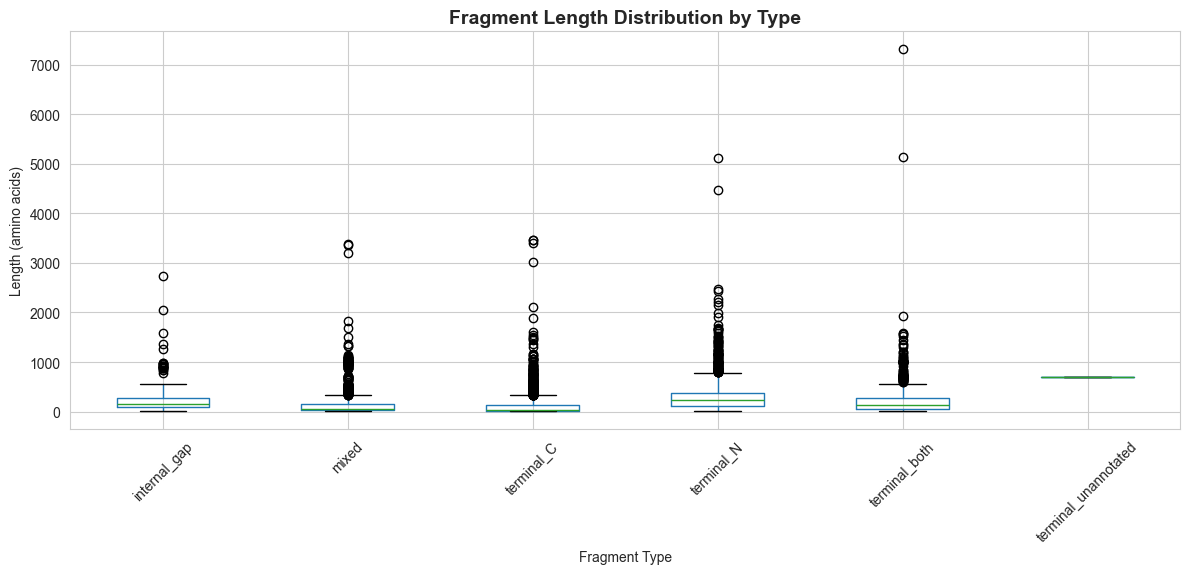

In [25]:
# Boxplot comparison
plt.figure(figsize=(12, 6))
df.boxplot(column='length', by='fragment_type', ax=plt.gca())
plt.xticks(rotation=45)
plt.suptitle('')
plt.title('Fragment Length Distribution by Type', fontsize=14, fontweight='bold')
plt.xlabel('Fragment Type')
plt.ylabel('Length (amino acids)')
plt.tight_layout()
plt.savefig('length_boxplot_by_type.png', dpi=300, bbox_inches='tight')
plt.show()

## 4. Analysis of 'X' Characters (Uncertain Amino Acids)

In [26]:
# Statistics about X characters
print("'X' Character Statistics:")
print("="*50)
print(f"Fragments with X: {(df['n_X'] > 0).sum():,} ({(df['n_X'] > 0).sum()/len(df)*100:.2f}%)")
print(f"Fragments without X: {(df['n_X'] == 0).sum():,} ({(df['n_X'] == 0).sum()/len(df)*100:.2f}%)")
print(f"\nTotal X characters: {df['n_X'].sum():,}")
print(f"Mean X per fragment: {df['n_X'].mean():.3f}")
print(f"Max X in a fragment: {df['n_X'].max()}")

print("\nX distribution by fragment type:")
print(df.groupby('fragment_type')['n_X'].agg(['count', 'sum', 'mean', 'max']).round(2))

'X' Character Statistics:
Fragments with X: 947 (10.20%)
Fragments without X: 8,333 (89.80%)

Total X characters: 3,935
Mean X per fragment: 0.424
Max X in a fragment: 567

X distribution by fragment type:
                      count   sum  mean  max
fragment_type                               
internal_gap            115   738  6.42  246
mixed                  1462  3197  2.19  567
terminal_C             2700     0  0.00    0
terminal_N             2675     0  0.00    0
terminal_both          2327     0  0.00    0
terminal_unannotated      1     0  0.00    0


## 5. Summary Statistics for Synthetic Fragment Generation

In [27]:
# Create comprehensive summary table
summary = []
for ftype in df['fragment_type'].unique():
    subset = df[df['fragment_type'] == ftype]
    summary.append({
        'Fragment Type': ftype,
        'Count': len(subset),
        'Percentage': len(subset) / len(df) * 100,
        'Target Count (100k)': int(100000 * len(subset) / len(df)),
        'Mean Length': subset['length'].mean(),
        'Median Length': subset['length'].median(),
        'Std Length': subset['length'].std(),
        'Min Length': subset['length'].min(),
        'Max Length': subset['length'].max(),
        '% with X': (subset['n_X'] > 0).sum() / len(subset) * 100
    })

summary_df = pd.DataFrame(summary)
summary_df = summary_df.sort_values('Count', ascending=False).reset_index(drop=True)

print("\nCOMPREHENSIVE SUMMARY FOR SYNTHETIC FRAGMENT GENERATION")
print("="*100)
print(summary_df.to_string(index=False))

# Save summary to CSV
summary_df.to_csv('fragment_distribution_summary.csv', index=False)
print("\n✓ Summary saved to 'fragment_distribution_summary.csv'")


COMPREHENSIVE SUMMARY FOR SYNTHETIC FRAGMENT GENERATION
       Fragment Type  Count  Percentage  Target Count (100k)  Mean Length  Median Length  Std Length  Min Length  Max Length  % with X
          terminal_C   2700   29.094828                29094   122.654444           33.0  227.773919           4        3470  0.000000
          terminal_N   2675   28.825431                28825   282.860935          226.0  287.793346           7        5120  0.000000
       terminal_both   2327   25.075431                25075   194.501074          128.0  264.561691           4        7311  0.000000
               mixed   1462   15.754310                15754   153.094391           45.5  276.240351           5        3374 63.132695
        internal_gap    115    1.239224                 1239   329.713043          158.0  440.226014          13        2738 20.869565
terminal_unannotated      1    0.010776                   10   695.000000          695.0         NaN         695         695  0.00000

In [28]:
# Save target counts for each fragment type (for 100,000 fragments)
target_counts = summary_df[['Fragment Type', 'Target Count (100k)']].set_index('Fragment Type').to_dict()['Target Count (100k)']

print("\nTarget counts for synthetic fragment generation (100,000 total):")
print("="*60)
total_check = 0
for ftype, count in sorted(target_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{ftype:20s}: {count:6,} fragments")
    total_check += count
print("="*60)
print(f"{'TOTAL':20s}: {total_check:6,} fragments")

# Note: Total may not be exactly 100,000 due to rounding
if total_check != 100000:
    print(f"\nNote: Rounding difference of {100000 - total_check} fragments")
    print("      Will need to adjust largest category to reach exactly 100,000")


Target counts for synthetic fragment generation (100,000 total):
terminal_C          : 29,094 fragments
terminal_N          : 28,825 fragments
terminal_both       : 25,075 fragments
mixed               : 15,754 fragments
internal_gap        :  1,239 fragments
terminal_unannotated:     10 fragments
TOTAL               : 99,997 fragments

Note: Rounding difference of 3 fragments
      Will need to adjust largest category to reach exactly 100,000


## 6. Key Findings & Next Steps

### Key Findings:
1. **Fragment Type Distribution**: Identified the percentage breakdown of each fragment type
2. **Length Distributions**: Each fragment type has characteristic length distributions
3. **X Characters**: Documented the prevalence of uncertain amino acids (X) in fragments

### Next Steps (Phase 2):
1. Load full SwissProt database (~570K proteins)
2. Filter for complete proteins (non-fragments)
3. Identify proteins with Domain annotations
4. Categorize proteins by suitability for creating each fragment type:
   - **terminal_N**: Need proteins with domain at N-terminus
   - **terminal_C**: Need proteins with domain at C-terminus
   - **terminal_both**: Need proteins with domains at both termini
   - **internal_gap**: Need proteins with internal domain(s)
   - **mixed**: Need proteins with multiple domains (N/C terminal + internal)
   - **terminal_unannotated**: Can be created from any protein
   - **complete**: Need proteins with sufficient annotation coverage

### Dataset Composition:
- **Total**: 200,000 sequences
  - 100,000 complete (non-fragmented) sequences
  - 100,000 synthetic fragments (matching distribution above)